In [1]:
!git clone https://github.com/coick4698/garbage_classification.git

Cloning into 'garbage_classification'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 62 (delta 18), reused 20 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 382.13 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/garbage_classification

import sys
sys.path.append('/content/garbage_classification/src')

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from dataset import get_dataloaders
from model import get_mobilenetv2, get_densenet121, get_squeezenet, get_shufflenetv2
from train import train_model
from utils import plot_accuracy, plot_confusion_matrix

# 데이터 경로 고정
data_path = '/content/drive/MyDrive/iss_project/garbage_classification'

Mounted at /content/drive
/content/garbage_classification


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 74.73%, Val Acc: 82.12%
Epoch [2/10] Train Acc: 83.51%, Val Acc: 83.67%
Epoch [3/10] Train Acc: 87.94%, Val Acc: 86.56%
Epoch [4/10] Train Acc: 89.86%, Val Acc: 85.76%
Epoch [5/10] Train Acc: 91.41%, Val Acc: 89.41%
Epoch [6/10] Train Acc: 92.78%, Val Acc: 90.36%
Epoch [7/10] Train Acc: 93.52%, Val Acc: 88.26%
Epoch [8/10] Train Acc: 94.66%, Val Acc: 91.51%
Epoch [9/10] Train Acc: 94.89%, Val Acc: 86.81%
Epoch [10/10] Train Acc: 95.36%, Val Acc: 89.01%


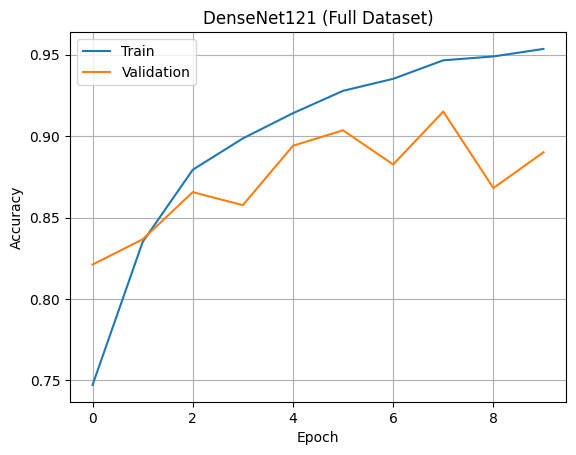

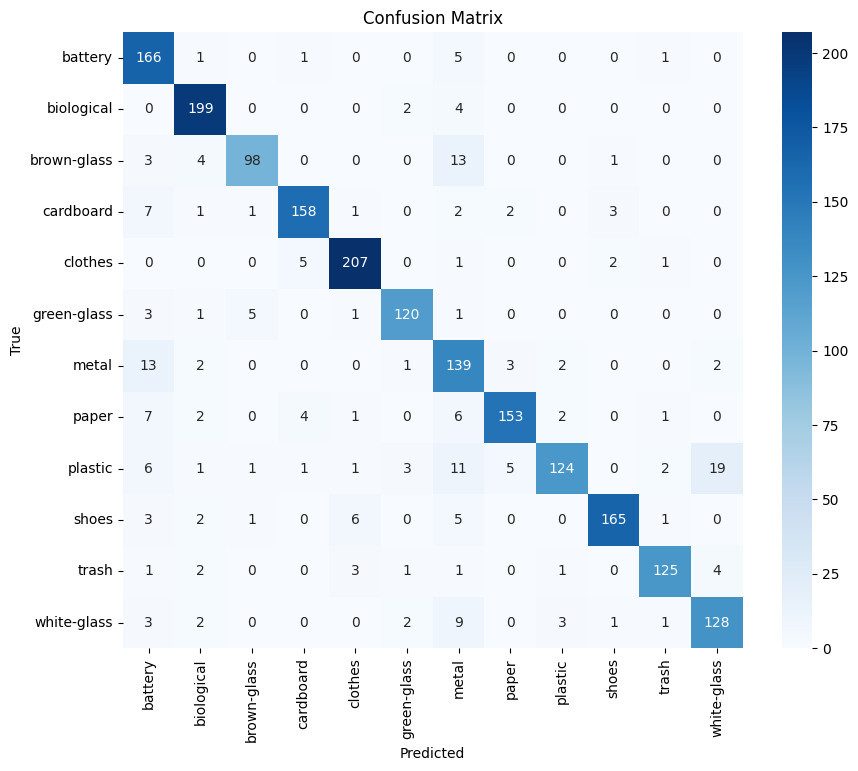

In [10]:
# DenseNet121 - Full dataset (11m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_densenet121(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="DenseNet121 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/densenet121_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 75.33%, Val Acc: 76.57%
Epoch [2/10] Train Acc: 84.59%, Val Acc: 81.22%
Epoch [3/10] Train Acc: 87.21%, Val Acc: 81.77%
Epoch [4/10] Train Acc: 89.49%, Val Acc: 82.92%
Epoch [5/10] Train Acc: 90.54%, Val Acc: 87.56%
Epoch [6/10] Train Acc: 91.91%, Val Acc: 89.16%
Epoch [7/10] Train Acc: 92.20%, Val Acc: 87.46%
Epoch [8/10] Train Acc: 93.02%, Val Acc: 89.56%
Epoch [9/10] Train Acc: 94.21%, Val Acc: 87.01%
Epoch [10/10] Train Acc: 93.39%, Val Acc: 87.91%


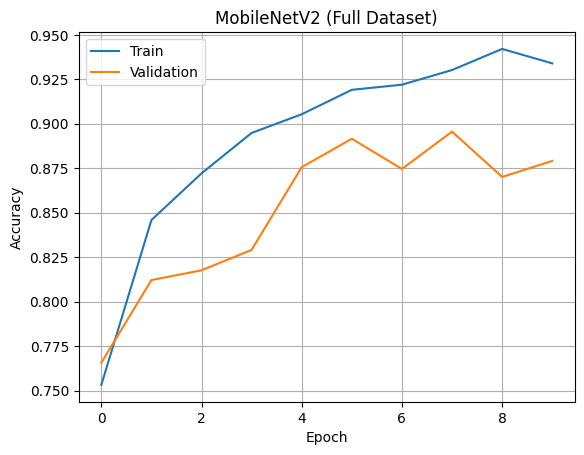

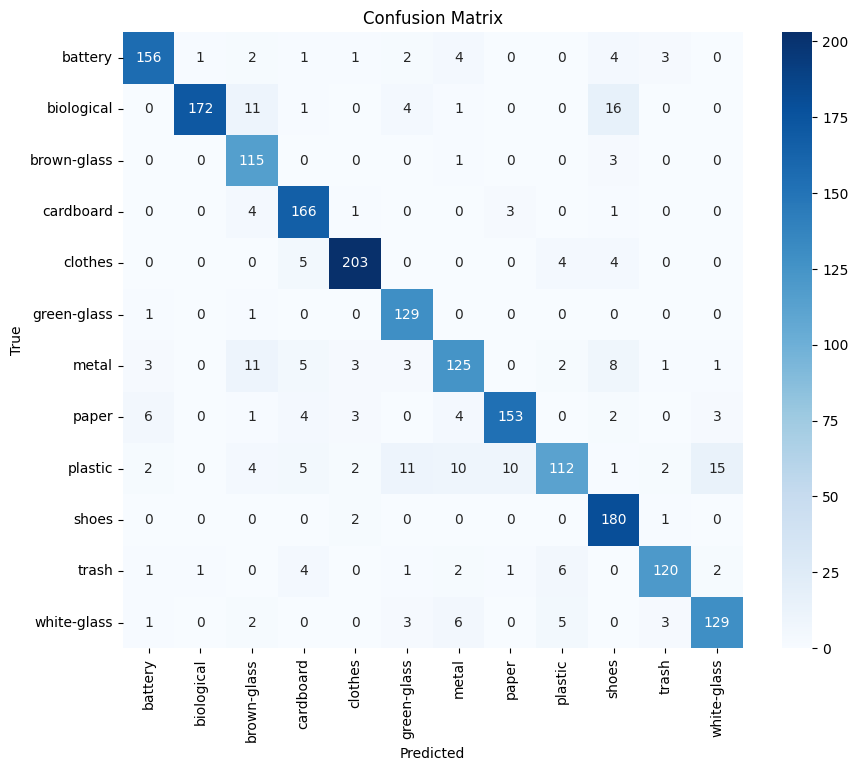

In [9]:
# MobilenetV2 - Full dataset (17m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_mobilenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="MobileNetV2 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/mobilenetv2_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 27.22%, Val Acc: 41.41%
Epoch [2/10] Train Acc: 47.80%, Val Acc: 55.64%
Epoch [3/10] Train Acc: 57.76%, Val Acc: 53.25%
Epoch [4/10] Train Acc: 62.58%, Val Acc: 67.63%
Epoch [5/10] Train Acc: 66.95%, Val Acc: 65.48%
Epoch [6/10] Train Acc: 71.02%, Val Acc: 72.33%
Epoch [7/10] Train Acc: 73.07%, Val Acc: 73.73%
Epoch [8/10] Train Acc: 73.93%, Val Acc: 71.18%
Epoch [9/10] Train Acc: 76.33%, Val Acc: 73.98%
Epoch [10/10] Train Acc: 78.12%, Val Acc: 76.17%


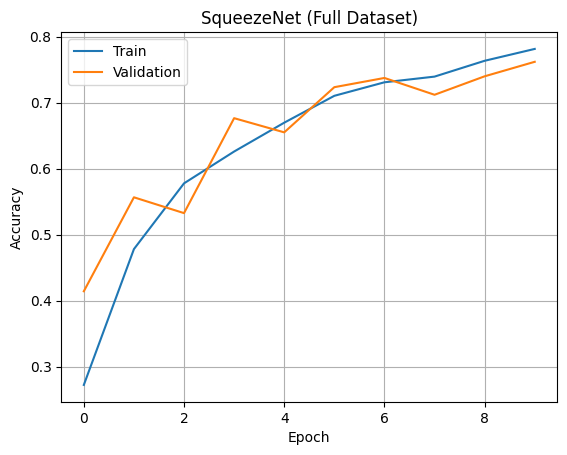

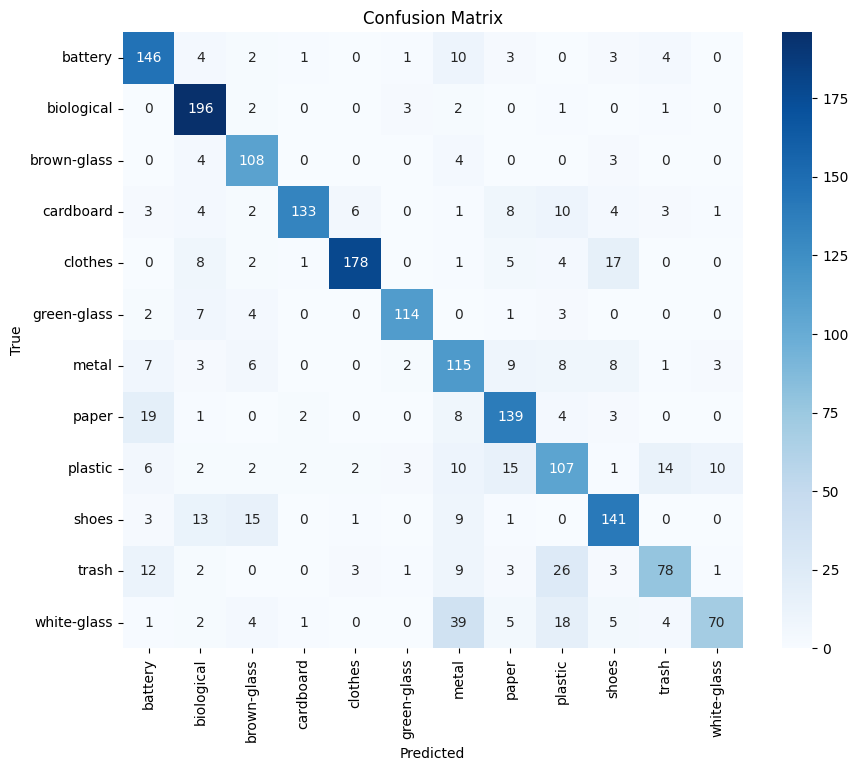

In [11]:
# Squeezenet - Full dataset(8m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_squeezenet(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="SqueezeNet (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/squeezenet_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 74.44%, Val Acc: 88.61%
Epoch [2/10] Train Acc: 89.19%, Val Acc: 90.76%
Epoch [3/10] Train Acc: 92.31%, Val Acc: 90.46%
Epoch [4/10] Train Acc: 95.07%, Val Acc: 93.41%
Epoch [5/10] Train Acc: 95.72%, Val Acc: 92.56%
Epoch [6/10] Train Acc: 96.84%, Val Acc: 91.46%
Epoch [7/10] Train Acc: 96.12%, Val Acc: 93.36%
Epoch [8/10] Train Acc: 96.92%, Val Acc: 91.81%
Epoch [9/10] Train Acc: 97.28%, Val Acc: 92.81%
Epoch [10/10] Train Acc: 97.88%, Val Acc: 91.81%


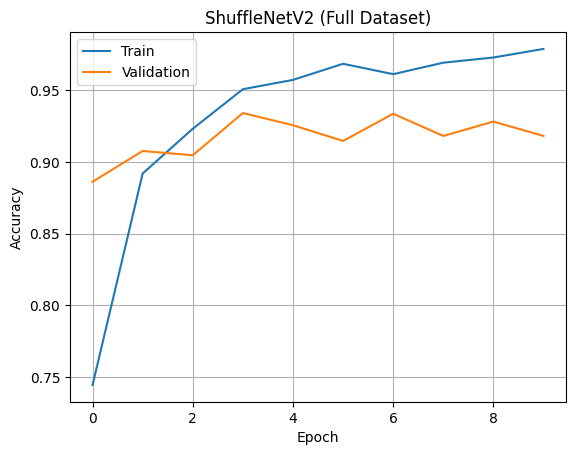

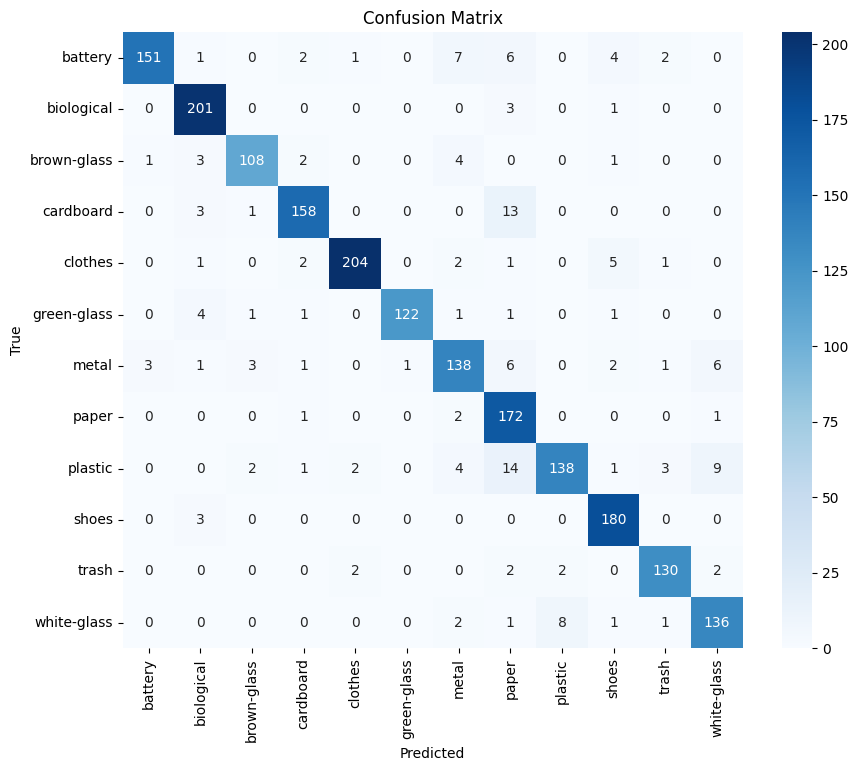

In [12]:
# ShufflenetV2 - Full dataset (8m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_shufflenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="ShuffleNetV2 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/shufflenetv2_full_epoch10.pth")

**Small Dataset**

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 63.77%, Val Acc: 63.16%
Epoch [2/10] Train Acc: 79.47%, Val Acc: 66.92%
Epoch [3/10] Train Acc: 86.05%, Val Acc: 68.17%
Epoch [4/10] Train Acc: 86.86%, Val Acc: 80.20%
Epoch [5/10] Train Acc: 89.05%, Val Acc: 79.20%
Epoch [6/10] Train Acc: 91.11%, Val Acc: 71.93%
Epoch [7/10] Train Acc: 92.49%, Val Acc: 79.70%
Epoch [8/10] Train Acc: 94.68%, Val Acc: 76.19%
Epoch [9/10] Train Acc: 95.37%, Val Acc: 84.21%
Epoch [10/10] Train Acc: 95.99%, Val Acc: 78.95%


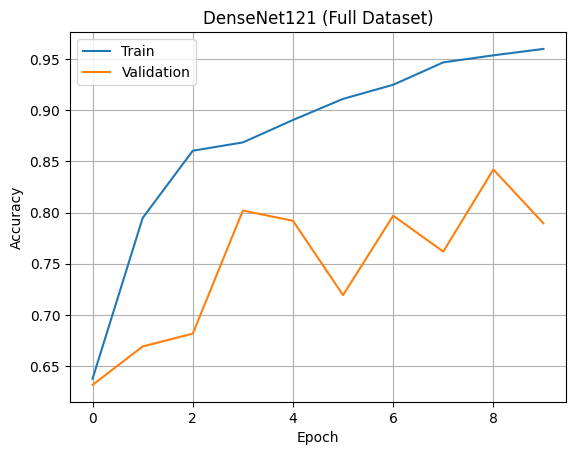

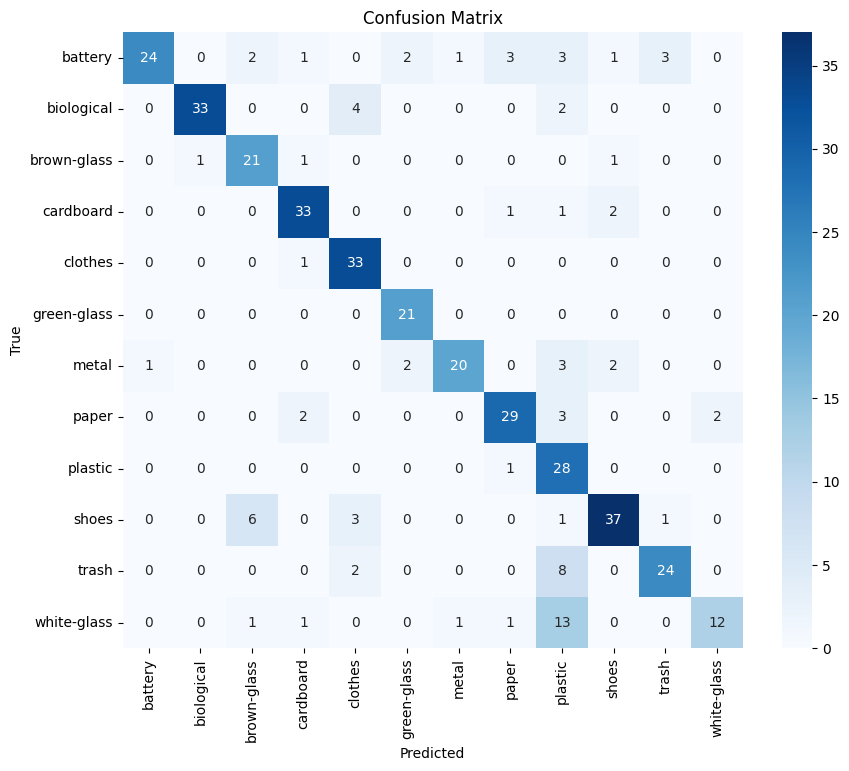

In [5]:
# DenseNet121 - Small dataset (5m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_densenet121(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="DenseNet121 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/densenet121_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 113MB/s] 


Epoch [1/10] Train Acc: 65.96%, Val Acc: 74.69%
Epoch [2/10] Train Acc: 81.23%, Val Acc: 81.95%
Epoch [3/10] Train Acc: 86.86%, Val Acc: 81.20%
Epoch [4/10] Train Acc: 89.99%, Val Acc: 69.92%
Epoch [5/10] Train Acc: 89.55%, Val Acc: 76.44%
Epoch [6/10] Train Acc: 88.67%, Val Acc: 81.45%
Epoch [7/10] Train Acc: 91.86%, Val Acc: 80.45%
Epoch [8/10] Train Acc: 93.12%, Val Acc: 76.44%
Epoch [9/10] Train Acc: 93.62%, Val Acc: 72.68%
Epoch [10/10] Train Acc: 95.49%, Val Acc: 84.21%


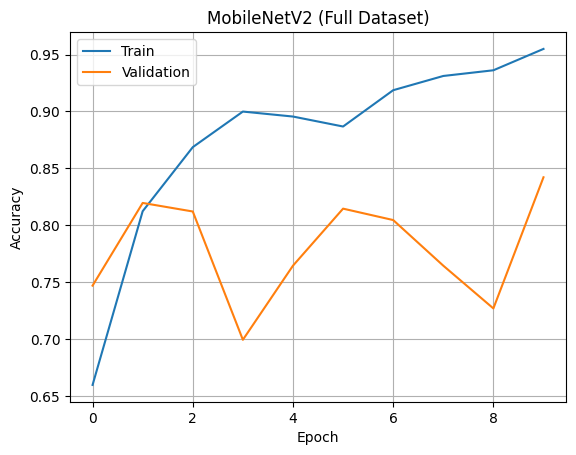

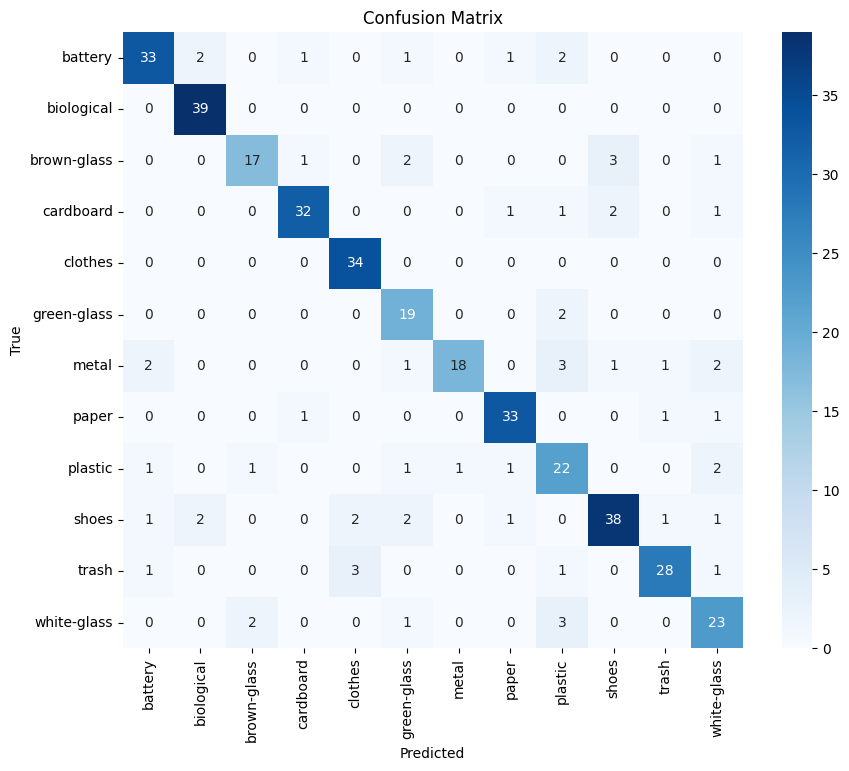

In [6]:
# MobilenetV2 - Small dataset (2m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_mobilenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="MobileNetV2 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/mobilenetv2_small_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 47.2MB/s]


Epoch [1/10] Train Acc: 16.65%, Val Acc: 23.31%
Epoch [2/10] Train Acc: 25.91%, Val Acc: 37.84%
Epoch [3/10] Train Acc: 35.04%, Val Acc: 40.60%
Epoch [4/10] Train Acc: 41.11%, Val Acc: 47.87%
Epoch [5/10] Train Acc: 46.37%, Val Acc: 44.61%
Epoch [6/10] Train Acc: 51.75%, Val Acc: 47.12%
Epoch [7/10] Train Acc: 54.44%, Val Acc: 50.13%
Epoch [8/10] Train Acc: 56.57%, Val Acc: 46.12%
Epoch [9/10] Train Acc: 57.38%, Val Acc: 58.65%
Epoch [10/10] Train Acc: 63.20%, Val Acc: 58.90%


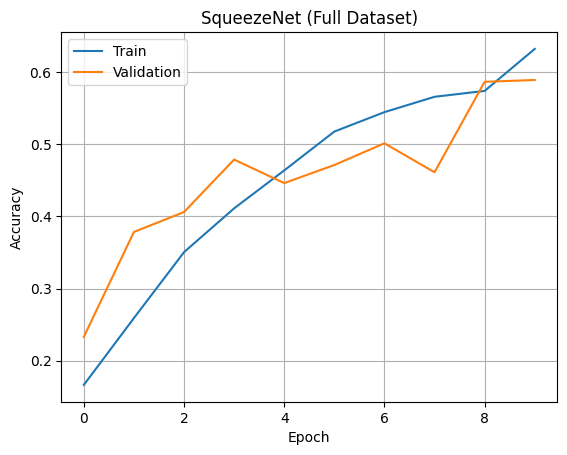

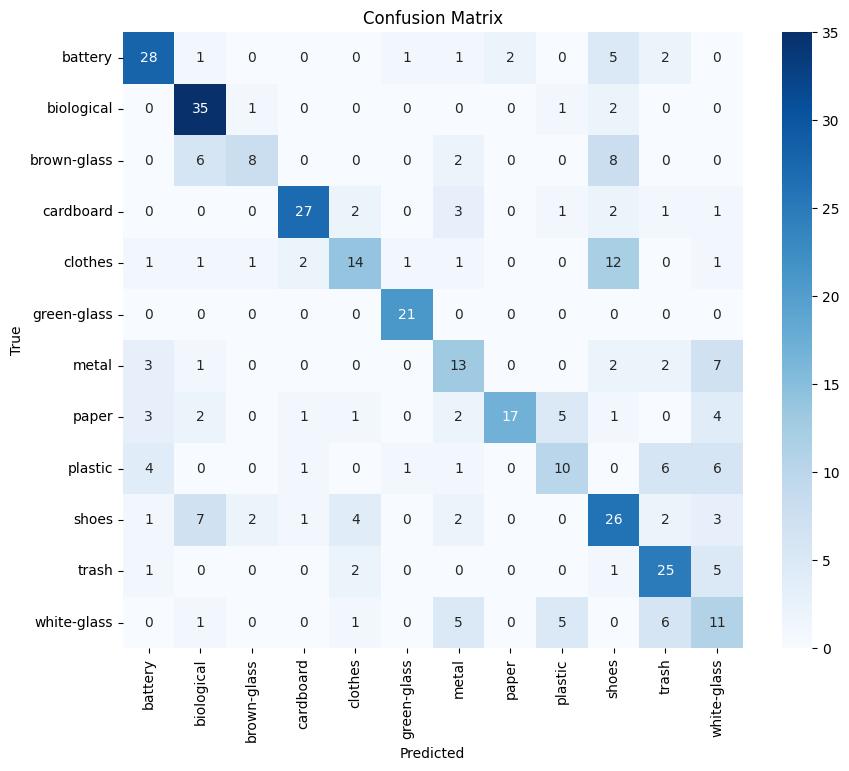

In [7]:
# Squeezenet - Small dataset(2m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_squeezenet(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="SqueezeNet (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/squeezenet_small_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 33.0MB/s]


Epoch [1/10] Train Acc: 55.63%, Val Acc: 75.69%
Epoch [2/10] Train Acc: 79.79%, Val Acc: 79.95%
Epoch [3/10] Train Acc: 89.80%, Val Acc: 80.45%
Epoch [4/10] Train Acc: 93.30%, Val Acc: 81.70%
Epoch [5/10] Train Acc: 94.56%, Val Acc: 84.96%
Epoch [6/10] Train Acc: 94.81%, Val Acc: 82.21%
Epoch [7/10] Train Acc: 96.31%, Val Acc: 84.46%
Epoch [8/10] Train Acc: 97.43%, Val Acc: 85.21%
Epoch [9/10] Train Acc: 97.93%, Val Acc: 85.96%
Epoch [10/10] Train Acc: 97.93%, Val Acc: 85.46%


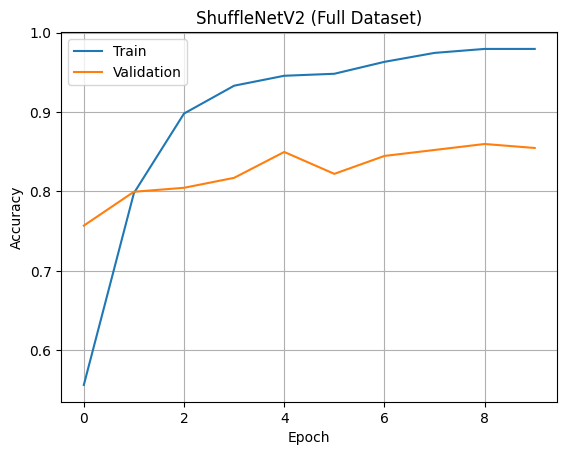

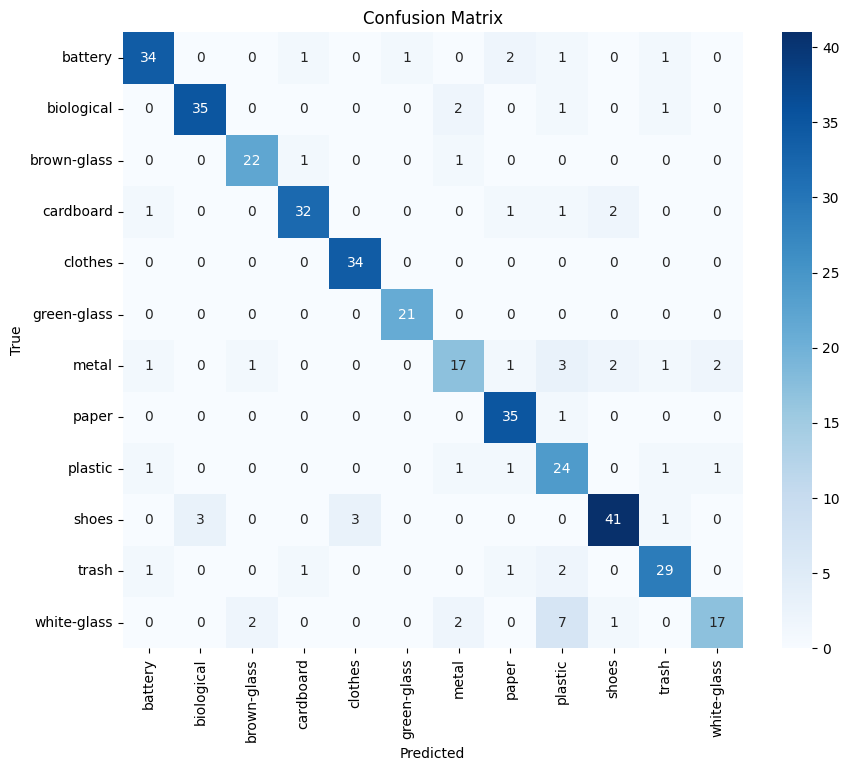

In [8]:
# ShufflenetV2 - Small dataset (1m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_shufflenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="ShuffleNetV2 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/shufflenetv2_small_epoch10.pth")